# Time Series Forecasting
## ARIMA - Auto Regressive Integrated Moving Average
### Durbin watson value should be either less than 1.5 or more than 2.5
### There must be date and time column
### Date column should be in sequence order
### There should not be any missing data - imputation method
### check whether we have trend, seasonality, cyclical and random noise - decomposition method
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

In [171]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import date time
from datetime import datetime
#import necessary sklearn libraries


#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [172]:
#import data and display dimensions
df = pd.read_csv('Quote-Equity-TATASTEEL-EQ-13-04-2024-to-13-04-2025.csv')
df.shape


(248, 14)

In [173]:
#display sample data
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,11-Apr-2025,EQ,134.67,134.70,130.49,127.18,133.47,133.42,133.00,184.6,122.62,"7,37,06,472","9,80,30,73,537.58","3,49,444"
1,09-Apr-2025,EQ,130.00,130.00,125.30,130.28,127.35,127.18,127.06,184.6,122.62,"7,33,99,980","9,32,62,18,503.85","4,26,871"
2,08-Apr-2025,EQ,134.89,136.20,128.02,129.48,130.05,130.28,131.06,184.6,122.62,"6,89,99,181","9,04,32,62,229.44","3,60,513"
3,07-Apr-2025,EQ,128.00,130.35,125.33,140.39,130.20,129.48,127.62,184.6,122.62,"12,18,06,340","15,54,44,31,644.89","6,07,208"
4,04-Apr-2025,EQ,152.62,152.99,140.00,153.62,140.67,140.39,143.35,184.6,122.62,"8,08,46,143","11,58,95,98,417.40","4,39,854"


In [174]:
#check for null values
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [175]:
#check for duplicate values
print('Data have ',df[df.duplicated].shape[0],' duplicate data')

Data have  0  duplicate data


In [176]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [177]:
#change columns name to appropreate name
df.columns = ['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'ltp',
       'close', 'vwap', '52W_H', '52W_L', 'VOLUME', 'VALUE','No_of_trades']
df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'ltp', 'close',
       'vwap', '52W_H', '52W_L', 'VOLUME', 'VALUE', 'No_of_trades'],
      dtype='object')

In [178]:
#check for data type
pd.concat([df.dtypes,df.head().T],axis=1)

,0,0,1,2,3,4
Date,object,11-Apr-2025,09-Apr-2025,08-Apr-2025,07-Apr-2025,04-Apr-2025
series,object,EQ,EQ,EQ,EQ,EQ
OPEN,float64,134.67,130.0,134.89,128.0,152.62
HIGH,float64,134.7,130.0,136.2,130.35,152.99
LOW,float64,130.49,125.3,128.02,125.33,140.0
PREV_CLOSE,float64,127.18,130.28,129.48,140.39,153.62
ltp,float64,133.47,127.35,130.05,130.2,140.67
close,float64,133.42,127.18,130.28,129.48,140.39
vwap,float64,133.0,127.06,131.06,127.62,143.35
52W_H,float64,184.6,184.6,184.6,184.6,184.6


Need to change Volume,Value and No_of_trades Datatype to integer

In [180]:
#cganging datatype of Volume,Value and No of trade  to integer
df['VOLUME'] = pd.to_numeric(df['VOLUME'].str.replace(',',''))
df['VALUE'] = pd.to_numeric(df['VALUE'].str.replace(',',''))
df['No_of_trades'] = pd.to_numeric(df['No_of_trades'].str.replace(',',''))

#display sample data
pd.concat([df.dtypes,df.head().T],axis=1)

,0,0,1,2,3,4
Date,object,11-Apr-2025,09-Apr-2025,08-Apr-2025,07-Apr-2025,04-Apr-2025
series,object,EQ,EQ,EQ,EQ,EQ
OPEN,float64,134.67,130.0,134.89,128.0,152.62
HIGH,float64,134.7,130.0,136.2,130.35,152.99
LOW,float64,130.49,125.3,128.02,125.33,140.0
PREV_CLOSE,float64,127.18,130.28,129.48,140.39,153.62
ltp,float64,133.47,127.35,130.05,130.2,140.67
close,float64,133.42,127.18,130.28,129.48,140.39
vwap,float64,133.0,127.06,131.06,127.62,143.35
52W_H,float64,184.6,184.6,184.6,184.6,184.6


In [181]:
# convert date filed into Date datatype
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] 

0     2025-04-11
1     2025-04-09
2     2025-04-08
3     2025-04-07
4     2025-04-04
         ...    
243   2024-04-22
244   2024-04-19
245   2024-04-18
246   2024-04-16
247   2024-04-15
Name: Date, Length: 248, dtype: datetime64[ns]

In [182]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV_CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades
0,2025-04-11,EQ,134.67,134.70,130.49,127.18,133.47,133.42,133.00,184.6,122.62,73706472,9.803074e+09,349444
1,2025-04-09,EQ,130.00,130.00,125.30,130.28,127.35,127.18,127.06,184.6,122.62,73399980,9.326219e+09,426871
2,2025-04-08,EQ,134.89,136.20,128.02,129.48,130.05,130.28,131.06,184.6,122.62,68999181,9.043262e+09,360513
3,2025-04-07,EQ,128.00,130.35,125.33,140.39,130.20,129.48,127.62,184.6,122.62,121806340,1.554443e+10,607208
4,2025-04-04,EQ,152.62,152.99,140.00,153.62,140.67,140.39,143.35,184.6,122.62,80846143,1.158960e+10,439854


In [183]:
print(df['series'].value_counts())

series
EQ    248
Name: count, dtype: int64


In [184]:
# !pip install holidays

In [185]:
from pandas.tseries.offsets import CustomBusinessDay
import holidays 

In [186]:
#get indian holidays
indian_holidays = holidays.India(years=[2024,2025])

#create custom buisness days
cust_bd = CustomBusinessDay(holidays=indian_holidays)

#generate businessdays in given period
bDay = pd.date_range(start="2024-04-11", end="2025-04-11",freq=cust_bd)

print(bDay)

DatetimeIndex(['2024-04-12', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25',
               ...
               '2025-03-27', '2025-03-28', '2025-04-01', '2025-04-02',
               '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-11'],
              dtype='datetime64[ns]', length=248, freq='C')


our data matches with indian business day. so,we can say that our data does not miss any data/date. 

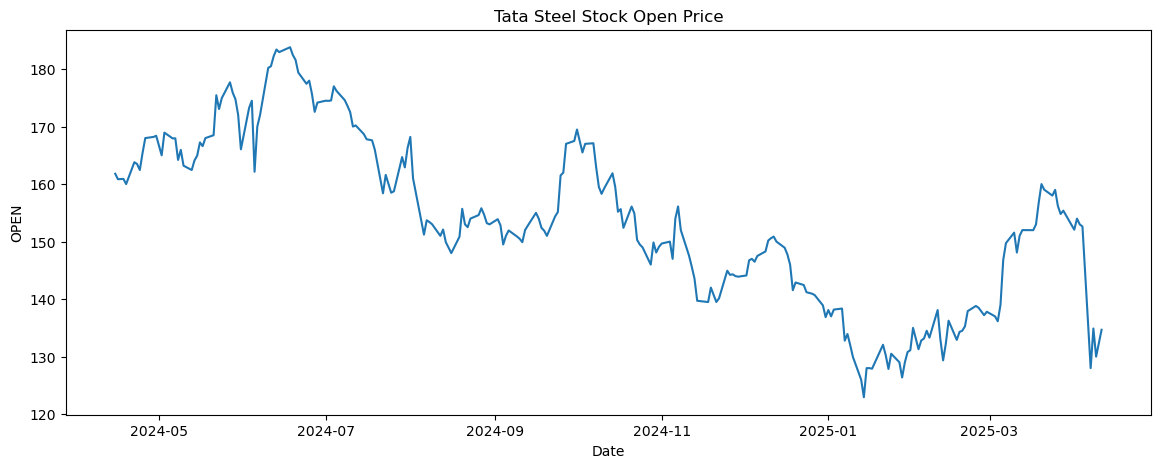

In [188]:
#Plot tatasteel stock open price
plt.figure(figsize=(14,5))
sns.lineplot(data=df,x=df['Date'],y=df['OPEN'])
plt.title('Tata Steel Stock Open Price')
plt.show()

In [189]:
#Durbin Watson Test to check autocorelation
import statsmodels.api as sm
sm.stats.durbin_watson(df['OPEN'])

0.0004305951578829008

In stock market, positive autocorrelation (when DW<2) in stock prices suggests that the price movements have a persistent trend. Positive autocorrelation indicates that the variable increased or decreased on a previous day, there is a there is a tendency for it to follow the same direction on the current day. 

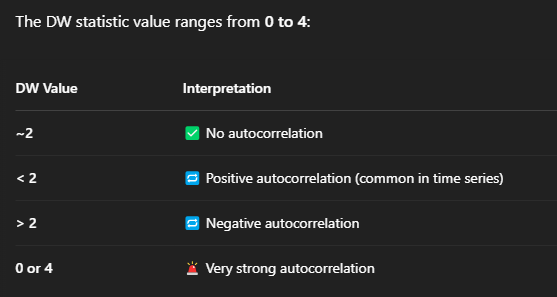tion

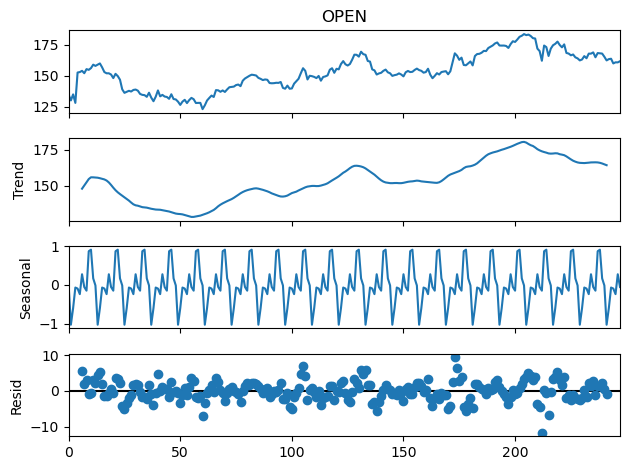

In [191]:
#Decomposition method to check trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['OPEN'], period=12)
decomposition.plot()
plt.show()

as per above plot we can say that we have upward trend and have seasonality with reseduals/noice

In [193]:
# make date as index column
df.set_index('Date',inplace=True)
df.head()

,series,OPEN,HIGH,LOW,PREV_CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades
Date,,,,,,,,,,,,,
2025-04-11,EQ,134.67,134.70,130.49,127.18,133.47,133.42,133.00,184.6,122.62,73706472,9.803074e+09,349444
2025-04-09,EQ,130.00,130.00,125.30,130.28,127.35,127.18,127.06,184.6,122.62,73399980,9.326219e+09,426871
2025-04-08,EQ,134.89,136.20,128.02,129.48,130.05,130.28,131.06,184.6,122.62,68999181,9.043262e+09,360513
2025-04-07,EQ,128.00,130.35,125.33,140.39,130.20,129.48,127.62,184.6,122.62,121806340,1.554443e+10,607208
2025-04-04,EQ,152.62,152.99,140.00,153.62,140.67,140.39,143.35,184.6,122.62,80846143,1.158960e+10,439854


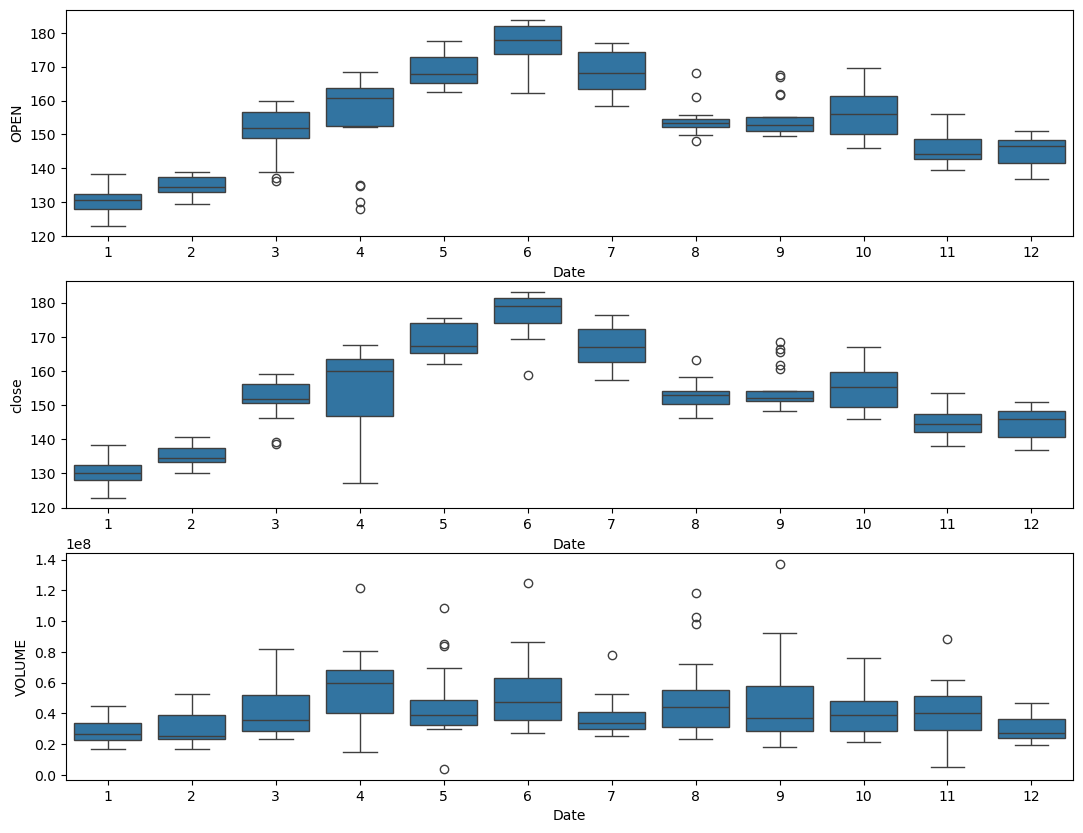

In [194]:
#plot box plot
plt.figure(figsize=(13,10))
plt.subplot(3,1,1)
sns.boxplot(x=df.index.month, y=df['OPEN'])  #month_name()

plt.subplot(3,1,2)
sns.boxplot(x=df.index.month, y=df['close'])

plt.subplot(3,1,3)
sns.boxplot(x=df.index.month, y=df['VOLUME'])

plt.show()

In [195]:
df['TimeStamp'] = df.index
df.head()


,series,OPEN,HIGH,LOW,PREV_CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades,TimeStamp
Date,,,,,,,,,,,,,,
2025-04-11,EQ,134.67,134.70,130.49,127.18,133.47,133.42,133.00,184.6,122.62,73706472,9.803074e+09,349444,2025-04-11
2025-04-09,EQ,130.00,130.00,125.30,130.28,127.35,127.18,127.06,184.6,122.62,73399980,9.326219e+09,426871,2025-04-09
2025-04-08,EQ,134.89,136.20,128.02,129.48,130.05,130.28,131.06,184.6,122.62,68999181,9.043262e+09,360513,2025-04-08
2025-04-07,EQ,128.00,130.35,125.33,140.39,130.20,129.48,127.62,184.6,122.62,121806340,1.554443e+10,607208,2025-04-07
2025-04-04,EQ,152.62,152.99,140.00,153.62,140.67,140.39,143.35,184.6,122.62,80846143,1.158960e+10,439854,2025-04-04


In [196]:
#train test split
train = df[df['TimeStamp']<'2025-02-01'] 
test = df[df['TimeStamp']>='2025-02-01']

print('Train: ',train.shape)
print('Test: ',test.shape)

Train:  (201, 14)
Test:  (47, 14)


80% of data : 248*0.8 = 198.4

## Model Building
### Automation Method : Facebook Prophet Model

In [199]:
# !pip install prophet

In [200]:
df_final = df[['TimeStamp','OPEN']]
df_final.columns=['ds','y']

df_final

,ds,y
Date,,
2025-04-11,2025-04-11,134.67
2025-04-09,2025-04-09,130.00
2025-04-08,2025-04-08,134.89
2025-04-07,2025-04-07,128.00
2025-04-04,2025-04-04,152.62
...,...,...
2024-04-22,2024-04-22,163.80
2024-04-19,2024-04-19,160.00
2024-04-18,2024-04-18,160.90


In [201]:
from prophet import Prophet
model = Prophet()
model.fit(df_final)

17:59:03 - cmdstanpy - INFO - Chain [1] start processing
17:59:04 - cmdstanpy - INFO - Chain [1] done processing


In [202]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [203]:
future_dates = model.make_future_dataframe(periods=100)
future_dates

,ds
0,2024-04-15
1,2024-04-16
2,2024-04-18
3,2024-04-19
4,2024-04-22
...,...
343,2025-07-16
344,2025-07-17
345,2025-07-18
346,2025-07-19


In [204]:
predict = model.predict(future_dates)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-15,163.518589,156.671035,171.493644,163.518589,163.518589,0.310293,0.310293,0.310293,0.310293,0.310293,0.310293,0.0,0.0,0.0,163.828882
1,2024-04-16,163.701087,156.156629,171.917612,163.701087,163.701087,0.400278,0.400278,0.400278,0.400278,0.400278,0.400278,0.0,0.0,0.0,164.101365
2,2024-04-18,164.066083,157.074552,172.326702,164.066083,164.066083,0.761170,0.761170,0.761170,0.761170,0.761170,0.761170,0.0,0.0,0.0,164.827254
3,2024-04-19,164.248582,157.426374,172.718438,164.248582,164.248582,0.339716,0.339716,0.339716,0.339716,0.339716,0.339716,0.0,0.0,0.0,164.588298
4,2024-04-22,164.796076,157.622603,172.451198,164.796076,164.796076,0.310293,0.310293,0.310293,0.310293,0.310293,0.310293,0.0,0.0,0.0,165.106369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-07-16,172.034599,157.320408,186.841284,159.555298,184.407416,-0.119884,-0.119884,-0.119884,-0.119884,-0.119884,-0.119884,0.0,0.0,0.0,171.914715
344,2025-07-17,172.262734,158.552777,186.884490,159.597861,184.871999,0.761170,0.761170,0.761170,0.761170,0.761170,0.761170,0.0,0.0,0.0,173.023904
345,2025-07-18,172.490868,158.320399,188.118522,159.627174,185.325844,0.339716,0.339716,0.339716,0.339716,0.339716,0.339716,0.0,0.0,0.0,172.830584
346,2025-07-19,172.719002,156.851718,187.299845,159.684393,185.767442,-0.518030,-0.518030,-0.518030,-0.518030,-0.518030,-0.518030,0.0,0.0,0.0,172.200972


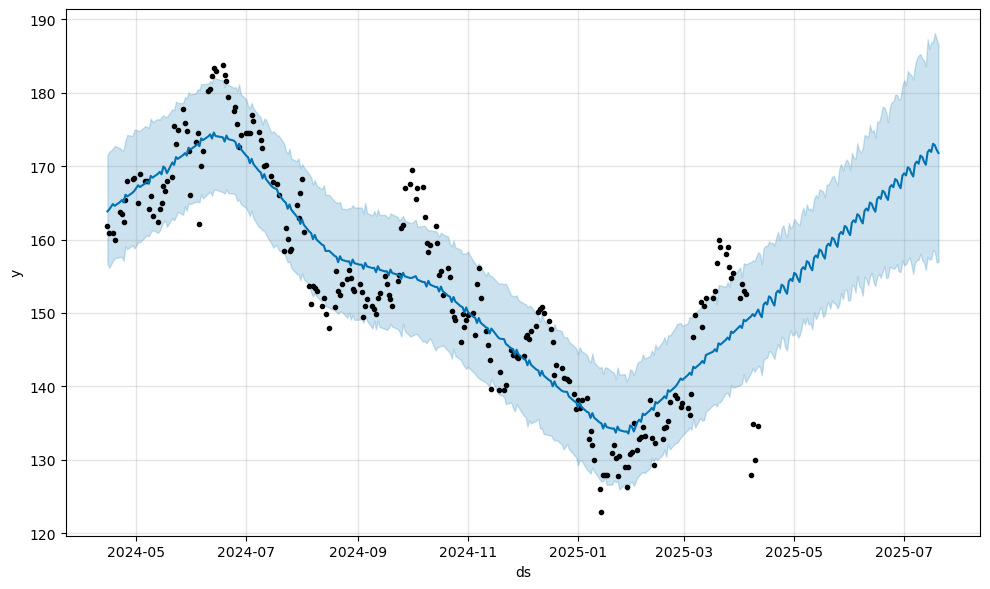

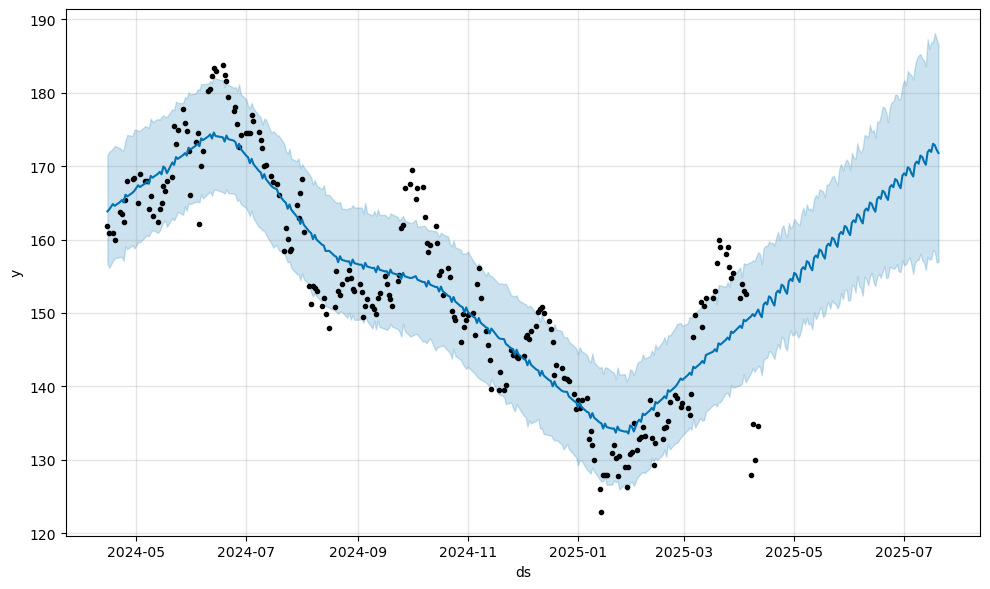

In [205]:
model.plot(predict)

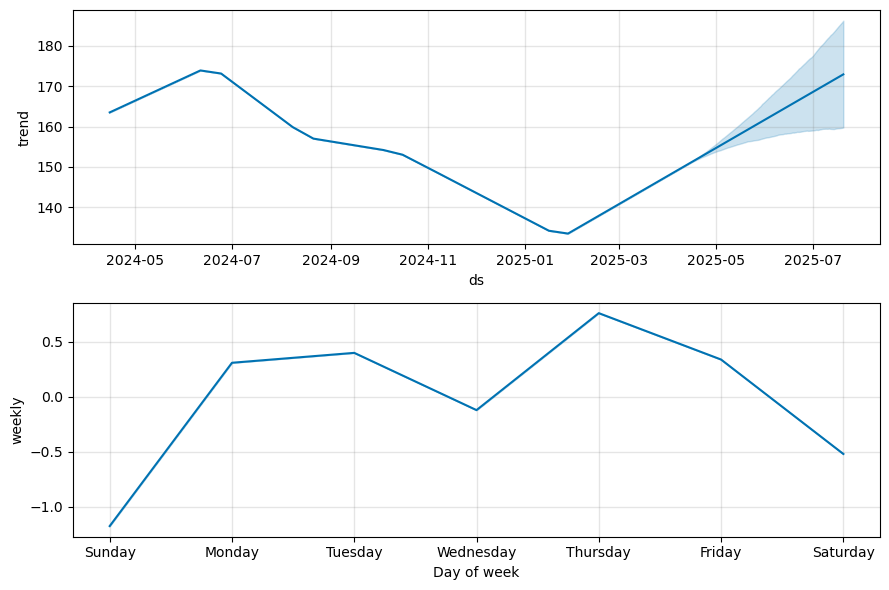

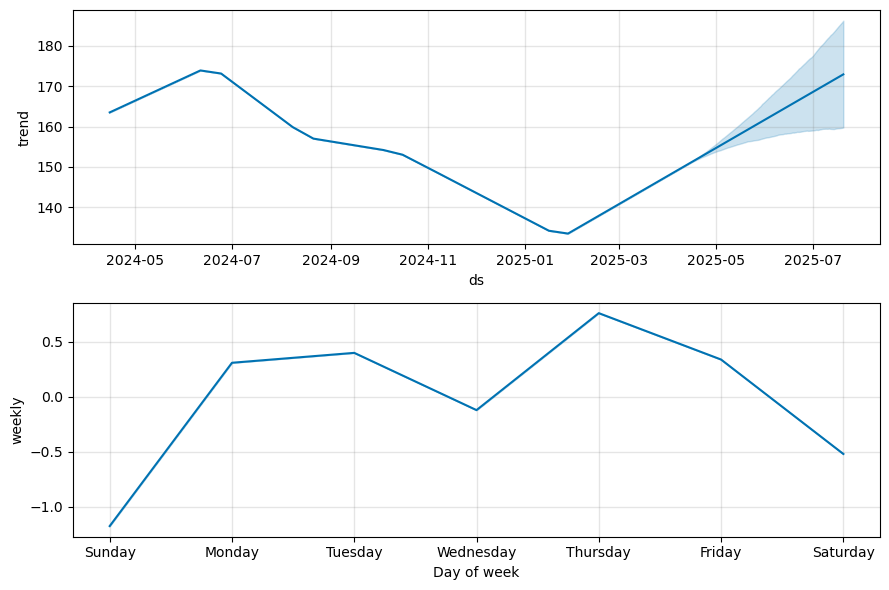

In [206]:
model.plot_components(predict)

In [207]:
from prophet.diagnostics import performance_metrics, cross_validation

In [208]:
df_cv = cross_validation(model, horizon="10 days")

  0%|          | 0/65 [00:00<?, ?it/s]

17:59:07 - cmdstanpy - INFO - Chain [1] start processing
17:59:08 - cmdstanpy - INFO - Chain [1] done processing
17:59:08 - cmdstanpy - INFO - Chain [1] start processing
17:59:08 - cmdstanpy - INFO - Chain [1] done processing
17:59:08 - cmdstanpy - INFO - Chain [1] start processing
17:59:08 - cmdstanpy - INFO - Chain [1] done processing
17:59:09 - cmdstanpy - INFO - Chain [1] start processing
17:59:09 - cmdstanpy - INFO - Chain [1] done processing
17:59:09 - cmdstanpy - INFO - Chain [1] start processing
17:59:09 - cmdstanpy - INFO - Chain [1] done processing
17:59:09 - cmdstanpy - INFO - Chain [1] start processing
17:59:09 - cmdstanpy - INFO - Chain [1] done processing
17:59:10 - cmdstanpy - INFO - Chain [1] start processing
17:59:10 - cmdstanpy - INFO - Chain [1] done processing
17:59:10 - cmdstanpy - INFO - Chain [1] start processing
17:59:10 - cmdstanpy - INFO - Chain [1] done processing
17:59:10 - cmdstanpy - INFO - Chain [1] start processing
17:59:11 - cmdstanpy - INFO - Chain [1]

In [209]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,35.633741,5.969400,4.940981,0.032700,0.030941,0.033001,0.521739
1,2 days,1494.659714,38.660829,11.527953,0.072423,0.038118,0.083909,0.454545
2,3 days,90.474694,9.511819,6.323061,0.041422,0.035184,0.042199,0.373967
3,4 days,63.676693,7.979768,6.637937,0.043763,0.039769,0.044535,0.372093
4,5 days,66.993860,8.184978,6.511603,0.042980,0.032433,0.043343,0.500000
5,6 days,77.514106,8.804210,7.164959,0.047823,0.042770,0.047732,0.347826
6,7 days,87.044208,9.329749,7.833448,0.051924,0.047569,0.051920,0.363636
7,8 days,114.498357,10.700391,8.780927,0.057638,0.050448,0.057967,0.250000
8,9 days,98.166922,9.907922,8.470275,0.055462,0.058000,0.056490,0.278409
9,10 days,118.259759,10.874730,8.669248,0.057554,0.047659,0.057836,0.260870


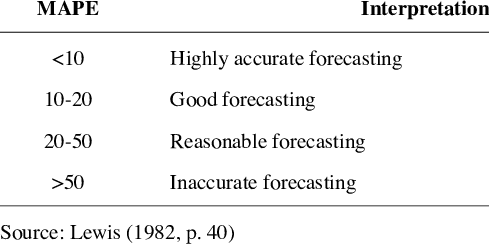![image.png]